# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import pandas as pd

# TODO: Number of training examples
no_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape
no_valid = n_validation[0]

# TODO: Number of testing examples.
n_test = y_test.shape
no_test = n_test[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", no_train)
print("Number of validation examples =", no_valid)
print("Number of testing examples =", no_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

[[24 23 22 ..., 24 25 26]
 [25 23 23 ..., 24 24 25]
 [26 23 23 ..., 24 24 25]
 ..., 
 [23 24 24 ..., 23 22 22]
 [23 24 24 ..., 23 22 21]
 [23 24 23 ..., 22 21 20]]


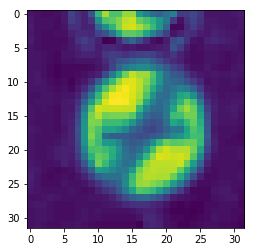

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Look at one training data entry in one color only
image = X_train[0,:,:,2]
print(image)
plt.imshow(image)

(32, 32, 3)


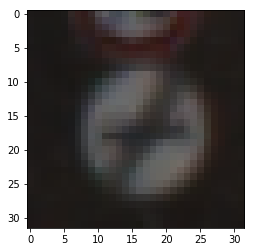

In [4]:
image = X_train[0,:,:,:]
print(image.shape)
plt.imshow(image)

In [5]:
# Look at the same image in gray scale
#X_train_gr = np.sum(X_train/3, axis=3, keepdims=True)
#print(X_train_gr.shape)
#image = X_train[0,:,:,:]
#print(image.shape)
#plt.imshow(image)

Observation:  Gray scale image looks much clearer than color image.

Get label dictionary 

In [6]:
def getSignNames():
    return pd.read_csv('./signnames.csv').values

sorted_y_train = np.sort(y_train) 
unique, counts = np.unique(sorted_y_train, return_counts=True)
for sign in getSignNames():
    sign_names = pd.read_csv('./signnames.csv').values
print(unique, counts, sign_names)
    
# dict(zip(unique, counts))
def Print_label_dict(y):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))

Print_label_dict(y_train)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210] [[0 'Speed limit (20km/h)']
 [1 'Speed limit (30km/h)']
 [2 'Speed limit (50km/h)']
 [3 'Speed limit (60km/h)']
 [4 'Speed limit (70km/h)']
 [5 'Speed limit (80km/h)']
 [6 'End of speed limit (80km/h)']
 [7 'Speed limit (100km/h)']
 [8 'Speed limit (120km/h)']
 [9 'No passing']
 [10 'No passing for vehicles over 3.5 metric tons']
 [11 'Right-of-way at the next intersection']
 [12 'Priority road']
 [13 'Yield']
 [14 'Stop']
 [15 'No vehicles']
 [16 'Vehicles over 3.5 metric tons prohibited']
 [17 'No entry']
 [18 'General caution']
 [19 'Dangerous curve to the left']
 [20 'Dangerous curve to the right']
 [21 'Double curve']
 [22 'Bumpy road']

34799
35299
7


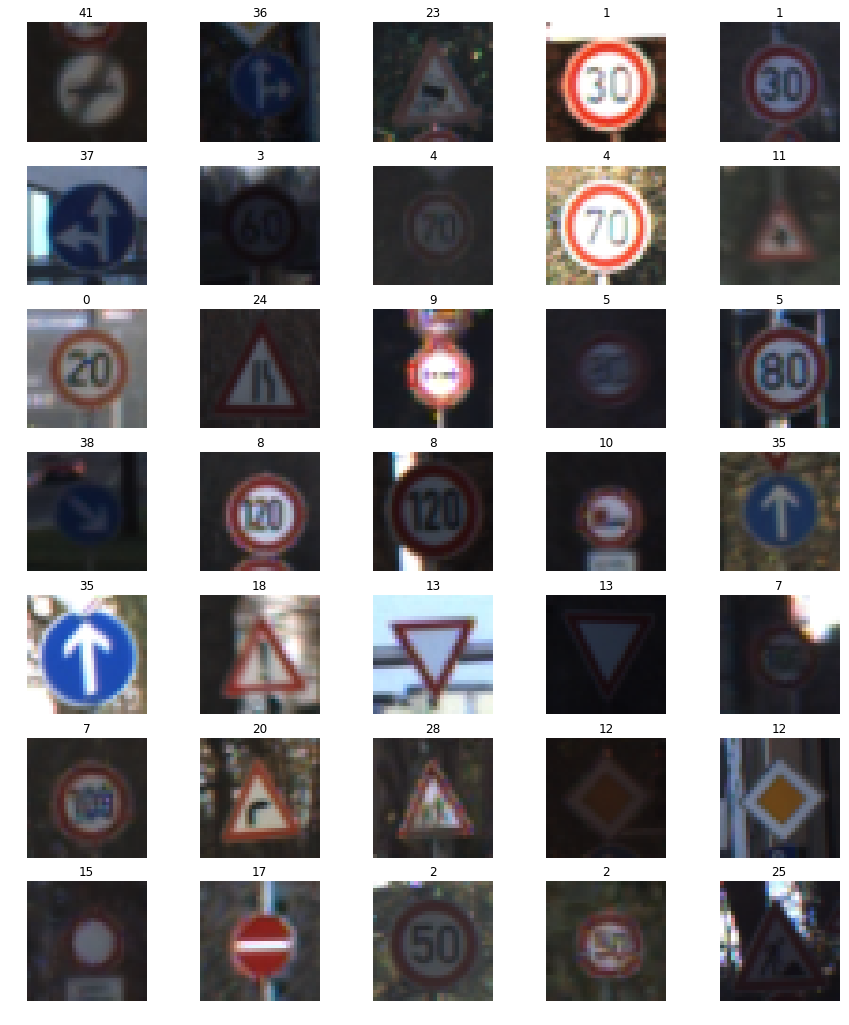

In [7]:
# Plot every 1000th image in train
step_size = 1000

# Set up objected oriented plotting
# Images arranged 5 in a row
n_img_plt = 0
print(no_train)
x = no_train + (step_size // 2)
print(x)
n_img_plt = (no_train + (step_size // 2)) // step_size
n_col = 5
n_row = (n_img_plt + n_col // 2) // n_col
print(n_row)         
fig, axs = plt.subplots(n_row, n_col, figsize=(15, 18))
axs = axs.ravel()

#Subplots are space 0.2" vertically and 0.001" horizontally
#fig.subplots_adjust(hspace = .2, wspace=.001)

for i in range(n_row * n_col):

    image = X_train[i*step_size,:,:,:]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[i*step_size])

    #(1, end_sample, step_size):
    #index = np.random.randint(0, len(X_train))
    #print(index)

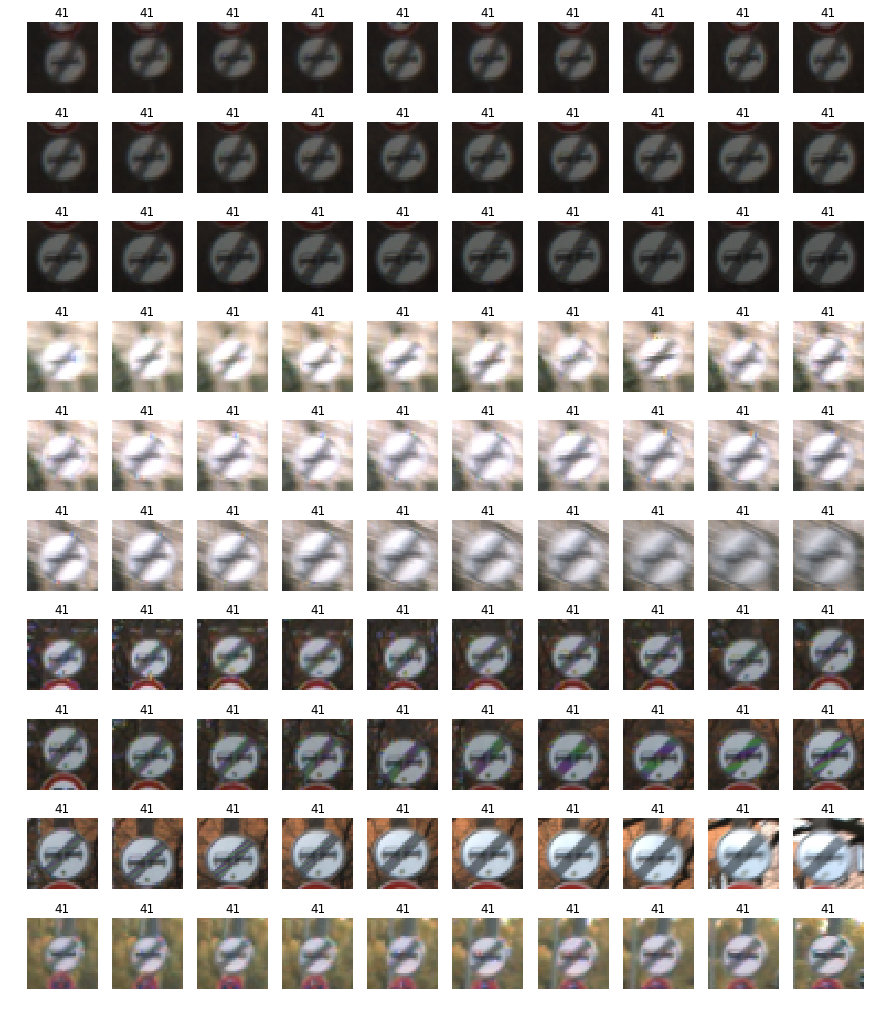

In [8]:
# Plot every 100 images in the first 10,000
step_size = 1

# Set up objected oriented plotting      
fig, axs = plt.subplots(10, 10, figsize=(15, 18))
axs = axs.ravel()

for i in range(100):
    image = X_train[i,:,:,:]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[i])

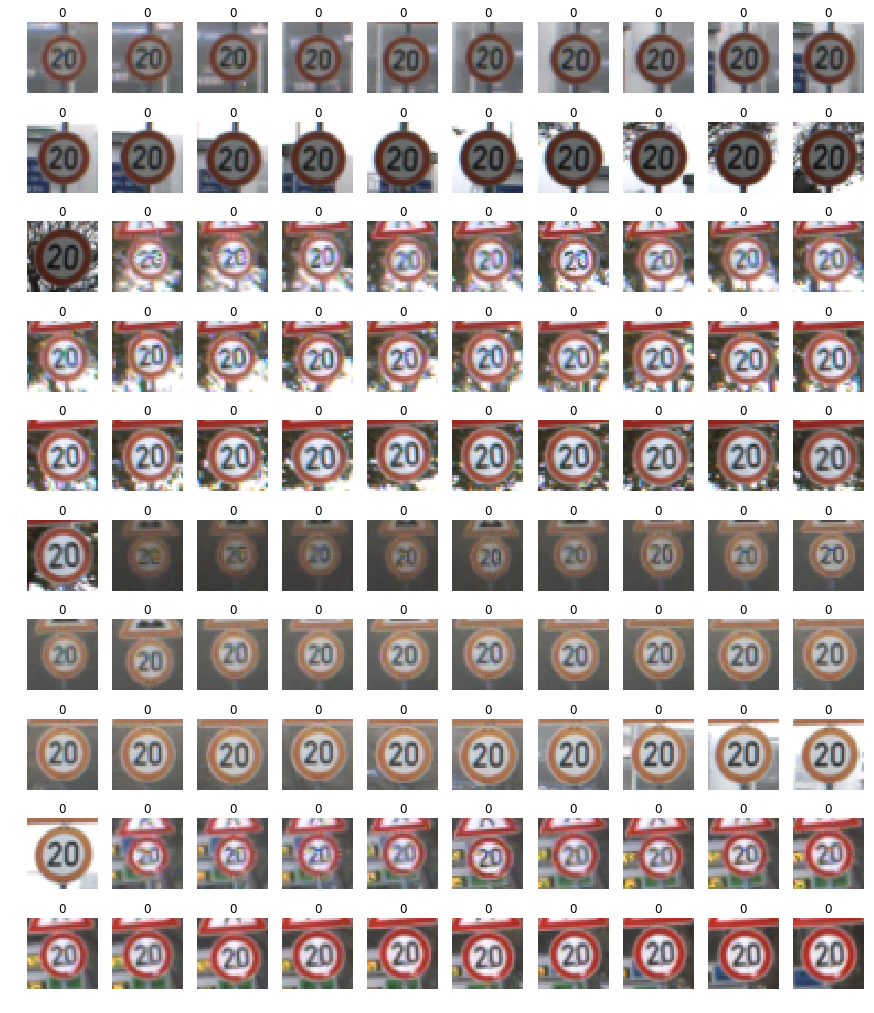

In [9]:
# Plot every 100 images in the second 10,000
step_size = 1

# Set up objected oriented plotting      
fig, axs = plt.subplots(10, 10, figsize=(15, 18))
axs = axs.ravel()

for i in range(100):
    image = X_train[i+9999,:,:,:]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[i+9999])

Observation:  Data with the same labels are bundled together.

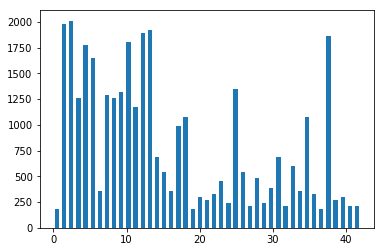

In [10]:
# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.6 * (bins[1] - bins[0])
# [:-1] is all elements except the first.  [1:] is all elements except the last.  
# Adding the two terms and then dividing by 2 is capturing all elements except for the first
# and the last, plus 1/2 of the first and 1/2 of the last
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [11]:
sorted_y_train = np.sort(y_train) 
unique, counts = np.unique(sorted_y_train, return_counts=True)
dict(zip(unique, counts))

{0: 180,
 1: 1980,
 2: 2010,
 3: 1260,
 4: 1770,
 5: 1650,
 6: 360,
 7: 1290,
 8: 1260,
 9: 1320,
 10: 1800,
 11: 1170,
 12: 1890,
 13: 1920,
 14: 690,
 15: 540,
 16: 360,
 17: 990,
 18: 1080,
 19: 180,
 20: 300,
 21: 270,
 22: 330,
 23: 450,
 24: 240,
 25: 1350,
 26: 540,
 27: 210,
 28: 480,
 29: 240,
 30: 390,
 31: 690,
 32: 210,
 33: 599,
 34: 360,
 35: 1080,
 36: 330,
 37: 180,
 38: 1860,
 39: 270,
 40: 300,
 41: 210,
 42: 210}

Observation: Quantities are not near evenly distributed across labels.

# 
## Step 2: Pre-process the Data Set 



# Convert to gray scale

First tried cv2.cvtColor

Result is that the white portion is darker than the color version e.g. X_train[0] 

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)
(32, 32, 1)


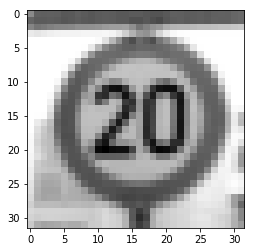

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells adef to_gray(color_series,gray_series,no_data):
def to_gray(color_series, no_data):
    gray_series = np.zeros((no_data,32,32))
    for i in range(no_data):
        gray_series[i] = cv2.cvtColor(color_series[i], cv2.COLOR_RGB2GRAY)
    gray_series = np.expand_dims(gray_series, axis=3)
    print(gray_series.shape)
    return gray_series 

X_train_gr = to_gray(X_train, no_train)
X_test_gr  = to_gray(X_test,  no_test)
X_valid_gr = to_gray(X_valid, no_valid)
       
# Sample check results
img = X_train_gr[10078]
print(img.shape)
plt.imshow(img.squeeze(), cmap='gray')

(32, 32, 1)


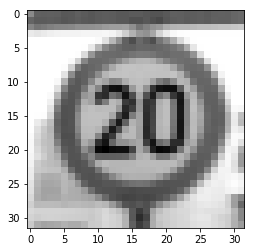

In [13]:
img = X_train_gr[10078]
print(img.shape)
plt.imshow(img.squeeze(), cmap='gray')

# Normalize gray scale data values to range (-1,1) 

In [14]:
def normalize(input):
    normalized = (input - 128)/128 
    print("Mean of normalized = ",np.mean(normalized))
    return normalized

X_train_gr_n = normalize(X_train_gr)
X_valid = normalize(X_valid_gr)
X_test = normalize(X_test_gr)          
          

Mean of normalized =  -0.360021574031
Mean of normalized =  -0.353489169512
Mean of normalized =  -0.365019658588


# Step 3: Add augmented training data

# Translate vertically and horizontally

(32, 32, 1)
(32, 32)
shape in/out: (32, 32, 1) (32, 32, 1)


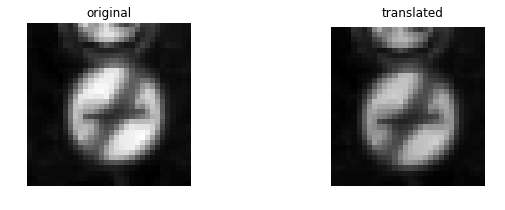

In [15]:
import cv2
'''
Conceptually, sets of parallel lines remain parallel after an affine transformation.
cv.WarpAffine(src, dst, mapMatrix, flags=CV_INTER_LINEAR+CV_WARP_FILL_OUTLIERS, 
              fillval=(0, 0, 0, 0)) → None
              src – input image.
dst         – output image that has the size dsize and the same type as src .
M           – 2 X 3 transformation matrix.
dsize       – size of the output image.
flags       – combination of interpolation methods (see resize() ) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( \texttt{dst}\rightarrow\texttt{src} ).
borderMode  – pixel extrapolation method (see borderInterpolate()); when borderMode=BORDER_TRANSPARENT , it means that the pixels in the destination image corresponding to the “outliers” in the source image are not modified by the function.
borderValue – value used in case of a constant border; by default, it is 0.
'''

def random_translate(img):
    rows,cols,_ = img.shape   
    # Set random translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    print(dst.shape)
    dst = dst[:,:,np.newaxis]
    return dst

test_img = X_train_gr_n[0]
print(test_img.shape)
test_dst = random_translate(test_img)
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)


Scale (crop) the image by a random pixel amount 

shape in/out: (32, 32, 1) (32, 32, 1)


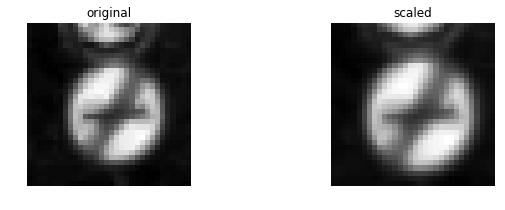

In [16]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-5,5)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)

# Augment data by warping originals

shape in/out: (32, 32, 1) (32, 32, 1)


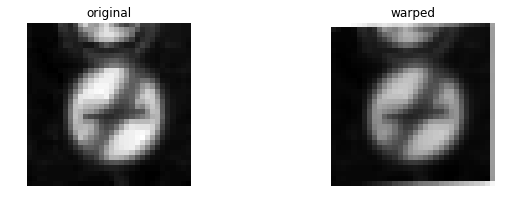

In [17]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('warped')

print('shape in/out:', test_img.shape, test_dst.shape)

# Augment data by randomizing brightness of original data

shape in/out: (32, 32, 1) (32, 32, 1)


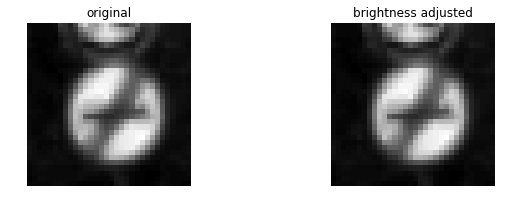

In [18]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)

In [19]:

print('X, y shapes:', X_train_gr_n.shape, y_train.shape)

input_indices = []
output_indices = []

# Loop through each of the classes in y
for class_n in range(n_classes):
   
    # Get array indice in y for the current label.   
    # print(class_n_indices) outputs (array(class_n_indices[0])) where class_n_indices[0] is a 1D array
    class_n_indices = np.where(y_train == class_n)
    
    # Get the number of occurence of a particular class in y
    n_samples = len(class_n_indices[0])
    
    # If the number of ocurrence of a particular class_n in y is 800 or more, no data augmentation.
    # It it is <800, perform data augmentation so that there will be 800 samples.
    if n_samples < 800:
        for i in range(800 - n_samples):
            
            # Wrap the iterator count around n_samples so the originals are always drawn from the same set of samples
            # in n_samples.  print(class_n_indices[0][i%n_samples]) outputs an index number.
            input_indices.append(class_n_indices[0][i%n_samples])
            
            # The output array size is increased by 1 from appending a new element to X_train_gr_n below.
            output_indices.append(X_train_gr_n.shape[0])
            # Note: print(X_train_gr_n.shape[0]) has output class_n_indices (32X32)
       
            # Wrap the iterator count around n_samples so the originals are always drawn from the same set of samples
            # in n_samples
            new_img = X_train_gr_n[class_n_indices[0][i % n_samples]]
            
            # Creat radom purmutated pixels
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            
            # Add the newly created image to training data and corresponding class label to the labels
            X_train_gr_n = np.concatenate((X_train_gr_n, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
    
X_train_n =  X_train_gr_n   
print('X, y shapes:', X_train_gr_n.shape, X_train_n.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

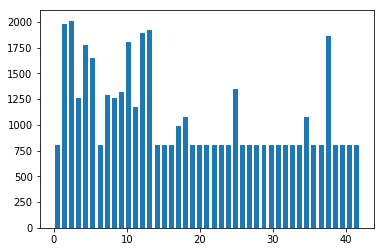

In [20]:

# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

# Step 4:  Define model architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

In [21]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [22]:
## Shuffle the training dataset
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train_n, y_train)

print('done')

done


In [23]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 100

print('done')

done


In [31]:
from tensorflow.contrib.layers import flatten

def lenet_Para(input):    

    #x: Input array of images.   
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TOWER 1
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1 = tf.nn.conv2d(input, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    conv1wb = tf.nn.bias_add(conv1, b1)
    print("Tower 1 layer 1 shape:",conv1wb.get_shape())

    # TODO: Activation.
    conv1r = tf.nn.relu(conv1wb)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # [batch, height, width, channels]
    x = tf.nn.max_pool(conv1r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2 = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    conv2wb = tf.nn.bias_add(conv2, b2)
                     
    # TODO: Activation.
    conv2r = tf.nn.relu(conv2wb)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(conv2r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    print("Tower 1 after pooling shape:",x.get_shape())
    # 
    # TOWER 2  ******************************************************************
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1a = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1a = tf.nn.conv2d(input, W1a, strides=[1, 1, 1, 1], padding='VALID')
    b1a = tf.Variable(tf.zeros(6))
    conv1awb = tf.nn.bias_add(conv1a, b1a)
    

    # TODO: Activation.
    conv1ar = tf.nn.relu(conv1awb)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # [batch, height, width, channels]
    x1a = tf.nn.max_pool(conv1ar, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2a = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2a = tf.nn.conv2d(x1a, W2a, strides=[1, 1, 1, 1], padding='VALID')
    b2a = tf.Variable(tf.zeros(16))
    conv2awb = tf.nn.bias_add(conv2a, b2a)
                     
    # TODO: Activation.
    conv2ar = tf.nn.relu(conv2a)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x1a = tf.nn.max_pool(conv2ar, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print("Tower 2 after pooling shape:",x1a.get_shape())

    # Merge Tower 1 and Tower 2
    x = tf.concat(3,[x, x1a])
    
    print(x.get_shape)
    # TODO: Flatten. Input = 5x5x16. Output = 800.
    
    x = flatten(x)
    
    # TODO: Layer 3: Fully Connected. Input = 800. Output = 120.
    W3 = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))    
    x = tf.add(tf.matmul(x, W3), b3)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84)) 
    x = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, W5), b5)
    
    return logits

print('done')

done


In [32]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

print('done')

done


# Step 5: Train the model coefficients and test the performance with validation set

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

'''Train your model here.
Calculate and report the accuracy on the training and validation set.
Once a final model architecture is selected, the accuracy on the test set should be 
calculated and reported as well.
'''

In [33]:
rate = 0.0009

logits = lenet_Para(x)

'''
tensorflow standard syntax  
softmax_cross_entropy_with_logits(
    _sentinel=None,
    labels=None,
    logits=None,
    dim=-1,
    name=None)
    
This op expects unscaled logits, since it performs a softmax on logits internally for 
efficiency. 
Do not call this op with the output of softmax, as it will produce incorrect results.
logits and labels must have the same shape, e.g. [batch_size, num_classes] 
and the same dtype (either float16, float32, or float64).
'''
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tower 1 layer 1 shape: (?, 28, 28, 6)
Tower 1 after pooling shape: (?, 5, 5, 16)
Tower 2 after pooling shape: (?, 5, 5, 16)
<bound method Tensor.get_shape of <tf.Tensor 'concat:0' shape=(?, 5, 5, 32) dtype=float32>>


In [34]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print(type(X_train.shape))
    print(type(y_train.shape))
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        print(type(X_train[0,1,1,0]))
        print(type(y_train[0]))
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet_Para')
    print("Model saved")

<class 'tuple'>
<class 'tuple'>
Training...

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 1 ...
Validation Accuracy = 0.689

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 2 ...
Validation Accuracy = 0.853

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 3 ...
Validation Accuracy = 0.902

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 4 ...
Validation Accuracy = 0.935

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 5 ...
Validation Accuracy = 0.947

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 6 ...
Validation Accuracy = 0.943

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 7 ...
Validation Accuracy = 0.945

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 8 ...
Validation Accuracy = 0.950

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 9 ...
Validation Accuracy = 0.960

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 10 ...
Validation Accuracy = 0.958

<class 'numpy.float64'>
<class 'numpy.int64'>
EPOCH 11 ...
Validation Accuracy = 0.9

# Step 6:  Evaluate performance of test set

In [36]:
import tensorflow as tf

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print("Dimensions of X_test = ", X_test.shape, "Dimensions of y_test = ",y_test.shape)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet_Para.meta')
    saver2.restore(sess, "./lenet_Para")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Dimensions of X_test =  (12630, 32, 32, 1) Dimensions of y_test =  (12630,)
Test Set Accuracy = 0.953


---

## Step 7: Evaluate performance with images obtained on the web

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

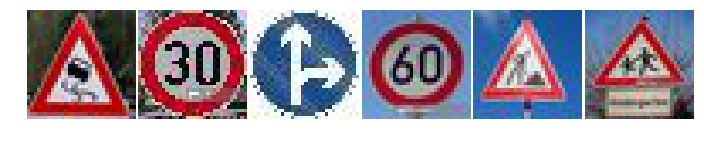

In [54]:
## Load pickled data
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob
import matplotlib.image as mpimg
from tensorflow.contrib.layers import flatten
import tensorflow as tf

fig, axs = plt.subplots(1,6, figsize=(12, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

# web_images has to be defined first before use (error message otherwise)
web_images = []

for i, img in enumerate(glob.glob('Web Traffic Signs Resized/*.jpg')):
    image = mpimg.imread(img)
 
    axs[i].axis('off')
    web_images.append(image)
    axs[i].imshow(image)


#0 25 Road work
#1 23 Slippery road
#2 36 Go straight or right
#3 1  Speed limit (30km/h)
#4 28 Children crossing


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

Dimensions of web_images (6, 32, 32, 3)
Length of web_images =  6
Dimensions of gray images =  (6, 32, 32, 1)
Mean of normalized =  -0.105214436849
Dimensions of normalized images =  (6, 32, 32, 1)
image index =  0
image index =  1
image index =  2
image index =  3
image index =  4
image index =  5
Web Images Accuracy = 0.667


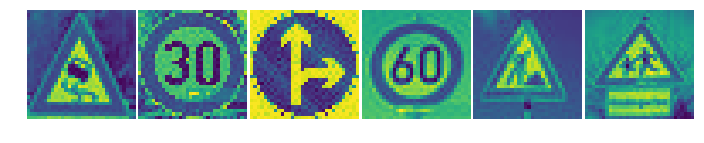

In [55]:
import cv2

web_images = np.asarray(web_images)
print("Dimensions of web_images", web_images.shape)

def to_gray(color_series, no_data):
    gray_series = np.zeros((no_data,32,32))
    for i in range(no_data):
        gray_series[i] = cv2.cvtColor(color_series[i], cv2.COLOR_RGB2GRAY)
    gray_series = np.expand_dims(gray_series, axis=3)
    return gray_series 

def normalize(input):
    normalized = (input - 128)/128 
    print("Mean of normalized = ",np.mean(normalized))
    return normalized

 
no_images = len(web_images)
print("Length of web_images = ", no_images)
web_images = to_gray(web_images, no_images)
print("Dimensions of gray images = ", web_images.shape)

web_images = normalize(web_images)
print("Dimensions of normalized images = ", web_images.shape)

fig, axs = plt.subplots(1,6, figsize=(12, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(no_images):    
    axs[i].axis('off')
    image = web_images[i,:,:,0]
    print("image index = ", i)
    axs[i].imshow(image)

web_labels = [23, 1, 36, 3, 25, 28]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet_Para.meta')
    saver3.restore(sess, "./lenet_Para")
    my_accuracy = evaluate(web_images, web_labels)
    print("Web Images Accuracy = {:.3f}".format(my_accuracy))

### Analyze Performance

Calculate the accuracy for these 5 new images. 
For example, if the model predicted 1 out of 5 signs correctly, 
it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

Data type for web_images is  <class 'numpy.ndarray'>
Dimensions of web_images are  (6, 32, 32, 1)
Correct labels are  [23, 1, 36, 3, 25, 28]


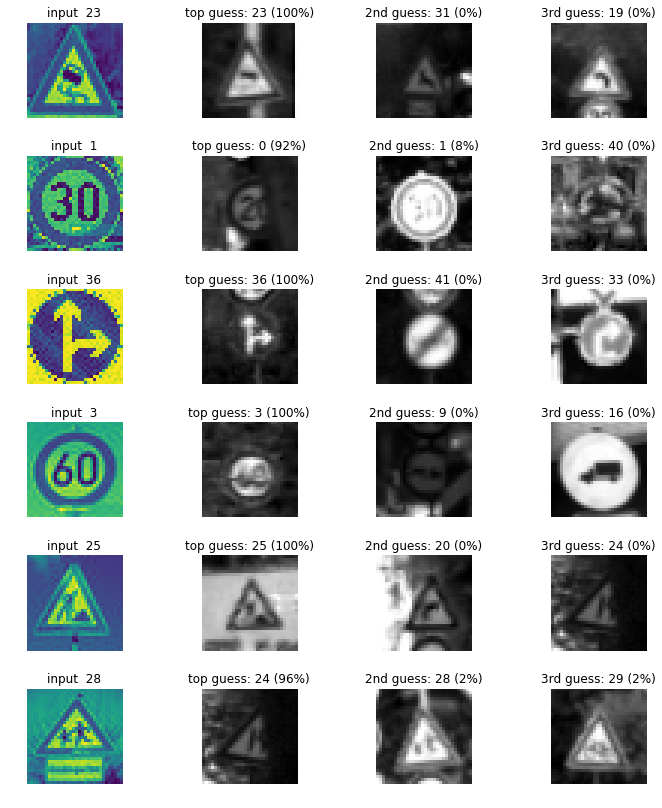

In [69]:
## Load pickled data
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob
import matplotlib.image as mpimg
from tensorflow.contrib.layers import flatten
import tensorflow as tf

softmax_logits = tf.nn.softmax(logits)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_Para.meta')
    saver.restore(sess, "./lenet_Para")
    
    top_k = tf.nn.top_k(softmax_logits, k=3)
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: web_images, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: web_images, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(web_images),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    
    print("Data type for web_images is ", type(web_images))
    print("Dimensions of web_images are ",web_images.shape)
    
    print("Correct labels are ","[23, 1, 36, 3, 25, 28]")

    for i, image in enumerate(web_images):
        axs[4*i].axis('off')
        img = web_images[i,:,:,0]
        plt.imshow(img)
        axs[4*i].imshow(img)
        axs[4*i].set_title('input  '+str(web_labels[i]))
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 8 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [40]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.
'''
image_input:        The test image being fed into the network to produce the feature maps

tf_activation:      A tf variable name used during training procedure that represents the 
                    calculated state of a specific weight layer. 
                    
activation_min/max: Used to view the activation contrast in more detail. By default, 
                    matplot sets min and max to the actual min and max values of the output.
                    
plt_num:            Used to plot out multiple different weight feature map sets on the same 
                    block, just extend the plt number for each new feature map entry
'''
 

def outputFeatureMap(image_input, tf_activation, activation_min=-1, 
                     activation_max=-1 ,plt_num=1):
    
    '''Here make sure to preprocess your image_input in a way your network expects
       with size, normalization, etc. if needed
    
       image_input =
       
       Note: x should be the same name as your network's tensorflow data placeholder 
       variable
    
       If you get an error tf_activation is not defined it may be having trouble accessing 
       the variable from inside a function 
    '''
    
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        
        # Set the number of feature maps to show on each row and column
        plt.subplot(6,8, featuremap+1) 
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", 
                       vmin =activation_min, vmax=activation_max, cmap="gray")
        
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", 
                       vmax=activation_max, cmap="gray")
        
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", 
                       vmin=activation_min, cmap="gray")
        
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [41]:
for i in [np.random.randint(0, no_train) for j in range(10)]:
    print('Label is ', y_train[i])
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.import_meta_graph('./lenet_Para.meta')
        saver.restore(sess, "./lenet_Para")
    
        conv1 = sess.graph.get_tensor_by_name('conv1')
        outputFeatureMap([X_train[i]], conv1)
        plt.show()
        
        conv1r = sess.graph.get_tensor_by_name('conv1r')
        outputFeatureMap([X_train[i]], conv1r)
        plt.show()
        
        conv2 = sess.graph.get_tensor_by_name('conv2')
        outputFeatureMap([X_train[i]], conv2)
        plt.show()
        
        conv2r = sess.graph.get_tensor_by_name('conv2r')
        outputFeatureMap([X_train[i]], conv2r)
        plt.show()
        
        conv1a = sess.graph.get_tensor_by_name('conv1a')
        outputFeatureMap([X_train[i]], conv1a)
        plt.show()
        
        conv1ar = sess.graph.get_tensor_by_name('conv1ar')
        outputFeatureMap([X_train[i]], conv1ar)
        plt.show()
        
        conv2a = sess.graph.get_tensor_by_name('conv2a')
        outputFeatureMap([X_train[i]], conv2a)
        plt.show()
        
        conv2ar = sess.graph.get_tensor_by_name('conv2ar')
        outputFeatureMap([X_train[i]], conv2ar)
        plt.show()

Label is  5


ValueError: The name 'conv1' looks like an (invalid) Operation name, not a Tensor. Tensor names must be of the form "<op_name>:<output_index>".